# Handshake Data Analysis:

**Understanding the Total Addressable Market of potential diverse STEM employees**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark-palette')
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('main_df.csv')
df.head()

,YEAR,MULTYEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,STRATA,GQ,...,INCWAGE,State,under_represented,domestic_born,EDU_verbose,is_STEM_degree,Degree,Degree_D,JobRole,stemType
0,2020,2016,202003,2,2016000000080,19.57,2020000000023,1,90001,1,...,29448,Alabama,0,1,High School,0,NaN,NaN,executive secretaries and executive administra...,-1
1,2020,2016,202003,3,2016000000107,35.02,2020000000033,1,30201,1,...,70113,Alabama,0,1,Associate,0,NaN,NaN,electrical and electronic engineering technolo...,Technologists and Technicians
2,2020,2016,202003,5,2016000000180,4.12,2020000000053,1,250001,1,...,84136,Alabama,0,1,High School,0,NaN,NaN,firstline supervisors of construction trades a...,-1
3,2020,2016,202003,6,2016000000300,48.41,2020000000063,1,270201,1,...,20710,Alabama,0,1,High School,0,NaN,NaN,nursing assistants,-1
4,2020,2016,202003,6,2016000000300,48.41,2020000000063,1,270201,1,...,20602,Alabama,0,1,Associate,0,NaN,NaN,dental assistants,-1


#### Question 1: How many under-represented persons get a STEM degree?

First, we look at the portion of under-represented individuals with a STEM degree - we note that unrepresented persons make up close to 30% of non-STEM degrees and 24% of STEM degrees based on census data from 2020.

In [3]:
pd.crosstab(
    df['is_STEM_degree'],
    df['under_represented'],
    normalize='index'
)

under_represented,0,1
is_STEM_degree,,
0,0.725675,0.274325
1,0.852441,0.147559


In [4]:
pd.crosstab(
    df['is_STEM_degree'],
    df['EDUC'],
    normalize='index'
)

EDUC,0,1,2,3,4,5,6,7,8,10,11
is_STEM_degree,,,,,,,,,,,
0,0.010891,0.003379,0.015675,0.0089,0.010673,0.016188,0.372589,0.172242,0.106794,0.179455,0.103214
1,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.573415,0.426585


#### Question 2: How many under-represented persons work in STEM?

In [5]:
df[df['stemType']!='-1']['under_represented'].value_counts(True)

0    0.855152
1    0.144848
Name: under_represented, dtype: float64

In [6]:
df.groupby('under_represented')['stemType'].value_counts(True)

under_represented  stemType                                                                       
0                  -1                                                                                 0.947883
                   Research, Development, Design, and Practitioners                                   0.037252
                   Managerial                                                                         0.006576
                   Research, Development, Design, and Practitioners; Technologists and Technicians    0.005013
                   Technologists and Technicians                                                      0.002912
                   Sales                                                                              0.000365
1                  -1                                                                                 0.974758
                   Research, Development, Design, and Practitioners                                   0.016705
             

About 26% of all individuals taking on a STEM role are from under-represented racial backgrounds.

#### Question 3: How many of those people have a STEM degree?

In [7]:
df[df['stemType']!='-1'].groupby('under_represented')['is_STEM_degree'].value_counts(True)

under_represented  is_STEM_degree
0                  1                 0.520940
                   0                 0.479060
1                  0                 0.594959
                   1                 0.405041
Name: is_STEM_degree, dtype: float64

statistically, a little bit more than half of the individuals from both represented and nonrepresented backgrounds have a degree in STEM that work in a STEM field.

#### Question 4: what roles do under-represented individuals in STEM tend to take on?
and, how does it compare to their counterparts in STEM?

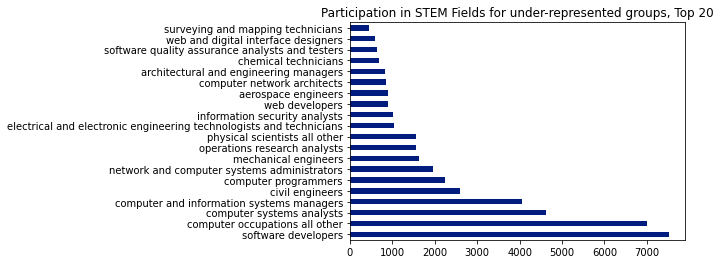

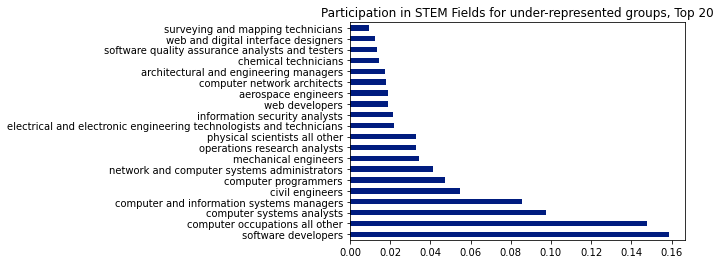

In [8]:
df[(df['stemType']!='-1') & (df['under_represented']==1)]['JobRole'].value_counts()[0:20].plot(kind='barh')
plt.title("Participation in STEM Fields for under-represented groups, Top 20")
plt.show()

df[(df['stemType']!='-1') & (df['under_represented']==1)]['JobRole'].value_counts(True)[0:20].plot(kind='barh')
plt.title("Participation in STEM Fields for under-represented groups, Top 20")
plt.show()

If we treat software developers and any other computer related fields as one broad category ("Software, Comptuing, and IT"), we get a clearer understanding of how many jobs are concentraded in software engineering:

In [9]:
df[df['stemType']!='-1']['JobRole'].value_counts(True)[0:5]

software developers                          0.200991
computer occupations all other               0.103671
computer and information systems managers    0.093110
computer systems analysts                    0.081026
civil engineers                              0.057942
Name: JobRole, dtype: float64

In [10]:
import re
r = re.compile(r'\bcomputer\b | \bsoftware\b | \bweb\b | \binformation\b', flags=re.I | re.X)
def broad_cat(role):
    if len(r.findall(role)) > 0:
        return 'Software, Computing, IT'
    return role 

df['JobRole'] = df['JobRole'].map(broad_cat)

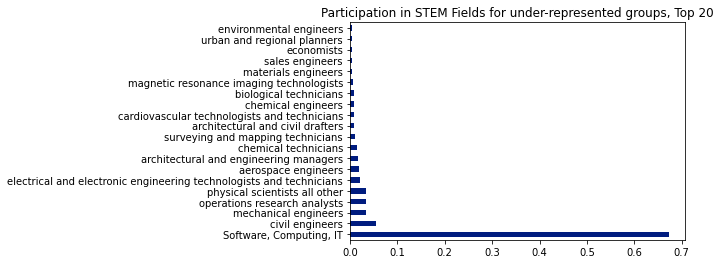

In [11]:
df[(df['stemType']!='-1') & (df['under_represented']==1)]['JobRole'].value_counts(True)[0:20].plot(kind='barh')
plt.title("Participation in STEM Fields for under-represented groups, Top 20")
plt.show()